# Day 9 : Rope Bridge
--------
This is my solution of [day 9](https://adventofcode.com/2022/day/9).

In [70]:
### Import function and Data
%run get_script.py 
from Script import input_as_lines
import numpy as np
import matplotlib.pyplot as plt

print("input_as_lines\n", input_as_lines.__doc__)
data = input_as_lines("Day_9.txt")

input_as_lines
 Return a list where each line in the input file is an element of the list


## Part One

In [71]:
class Tail():
    def __init__(self, pos_x:int, pos_y:int):
        self.x = pos_x
        self.y = pos_y
        self.path = []
        self.add_path()
    
    def move(self, head):
        if (abs(self.x - head.x) >=2) and (self.y == head.y):
            self.x += np.sign(head.x-self.x)
        elif (abs(self.y - head.y) >=2) and (self.x == head.x):
            self.y += np.sign(head.y-self.y)
        elif (abs(self.y - head.y) >=2) and (self.x != head.x):
            self.x += np.sign(head.x-self.x)
            self.y += np.sign(head.y-self.y)
        elif (abs(self.x - head.x) >=2) and (self.y != head.y):
            self.x += np.sign(head.x-self.x)
            self.y += np.sign(head.y-self.y)

        self.add_path()

    def add_path(self):
        if [self.x,self.y] not in self.path:
            self.path.append([self.x,self.y])

class Head():
    def __init__(self, pos_x:int, pos_y:int):
        self.x = pos_x
        self.y = pos_y

    def move(self, direction):
        if direction=="R":
            self.x +=1
        if direction=="L":
            self.x -=1
        if direction=="U":
            self.y +=1
        if direction=="D":
            self.y -=1

In [72]:
#print("== Initial State ==")
tail = Tail(0,0)
head = Head(0,0)

#print(f"head = ({head.x},{head.y})")
#print(f"tail = ({tail.x},{tail.y})")

for line in data:
    direction, length = line.split(" ")
    #print(f"== {line} ==")
    for _ in range(int(length)):
        head.move(direction=direction)
        tail.move(head)
        #print(f"head = ({head.x},{head.y})")
        #print(f"tail = ({tail.x},{tail.y})")

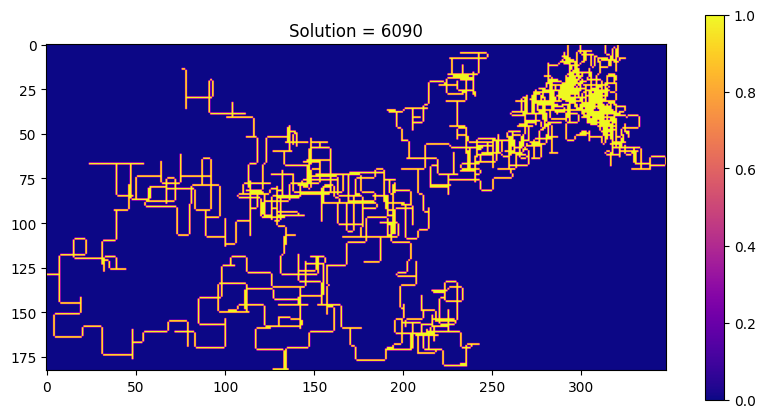

In [73]:
n,m = np.array(tail.path).max(axis=0) - np.array(tail.path).min(axis=0)+1
M = np.zeros((n, m))
for (i,j) in tail.path:
    M[i - np.array(tail.path).min(axis=0)[0],j - np.array(tail.path).min(axis=0)[1]] = 1

fig, ax = plt.subplots(figsize=(10, 5), ncols=1)
img = ax.imshow(np.flip(M.T, axis=0), cmap = plt.cm.plasma)
fig.colorbar(img)
ax.set_title(f"Solution = {len(tail.path)}")
plt.show()

## Part Two

In [74]:
head = Head(0,0)
tails = [Tail(0,0) for _ in range(9)]

for line in data:
    direction, length = line.split(" ")
    #print(f"== {line} ==")
    for _ in range(int(length)):
        head.move(direction=direction)
        tails[0].move(head)
        for i in range(1, 9):
            tails[i].move(tails[i-1])
        #print(f"head = ({head.x},{head.y})")
        #print(f"tail = ({tail.x},{tail.y})")

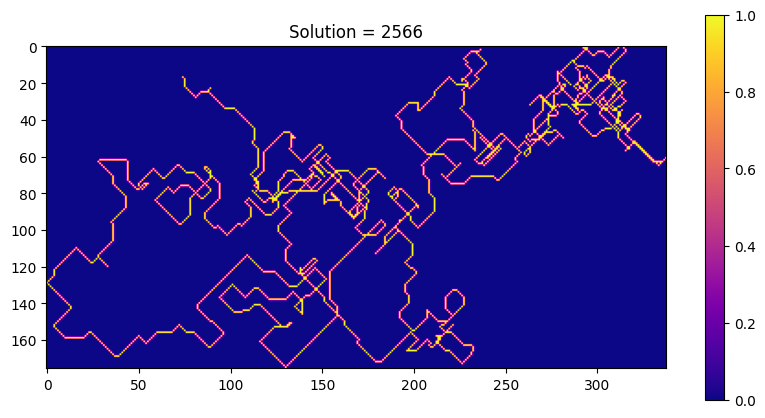

In [75]:
n,m = np.array(tails[-1].path).max(axis=0) - np.array(tails[-1].path).min(axis=0)+1
M = np.zeros((n, m))
for (i,j) in tails[-1].path:
    M[i - np.array(tails[-1].path).min(axis=0)[0],j - np.array(tails[-1].path).min(axis=0)[1]] = 1

fig, ax = plt.subplots(figsize=(10, 5), ncols=1)
img = ax.imshow(np.flip(M.T, axis=0), cmap = plt.cm.plasma)
fig.colorbar(img)
ax.set_title(f"Solution = {len(tails[-1].path)}")
plt.show()

--------
<small>Solution can be found [here](https://old.reddit.com/r/adventofcode/comments/zgnice/2022_day_9_solutions/)